In [295]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
import os

# Directory paths
data_dir = "data/"
models_dir = "models/"

# Create the models directory if it doesn't exist
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Load categories you're interested in
categories = ['alarm-clock', 'airplane', 'apple', 'banana', 'beach', 'bicycle', 'bridge', 'EiffelTower']
#categories = ['alarm-clock', 'airplane', 'apple']

# Function to load data for a given category
def load_data(category):
    file_path = f"{data_dir}{category}.npy"
    data = np.load(file_path, allow_pickle=True)
    return data

# Resize image to match MobileNet input size
def preprocess_image(img):
    #img = cv2.resize(img, (224, 224))
    #img = np.expand_dims(img, axis=0)

    #if len(img.shape) == 2:  # Grayscale image (single channel)
    #    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    #change array to two dimenstions
    img = np.reshape(img, (28, 28)) 
    # Resize the image to the target size
    #img = cv2.resize(img, (224, 224))
    img = cv2.resize(img, (32, 32))
    img = np.expand_dims(img, axis=2)
    img = np.repeat(img, 3, axis=2)


    # Handle batch dimension (depending on your data structure)
    #if len(img.shape) == 3:  # Single image, add batch dimension
    #    img = np.expand_dims(img, axis=0)  # Add batch dimension for a single image

    
    img = preprocess_input(img)
    return img


# Load MobileNet model without top layer
# Load weights from the local file
#base_model = MobileNet(weights='models/mobilenet_1_0_224_tf_no_top.h5', include_top=False, input_shape=(224, 224,3))
base_model = MobileNet(weights='models/mobilenet_1_0_224_tf_no_top.h5', include_top=False, input_shape=(32, 32,3)) # minimum size required

# Add classification head
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(len(categories), activation='softmax')(x)

# Combine base model with classification head
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
# Define the learning rate
learning_rate = 0.000001  # Example learning rate value, you can adjust this value as needed

# Create the Adam optimizer with the specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])




In [2]:
category = 'alarm-clock'  # Modify this line to specify the category
data0 = load_data(category)
data0.shape

(123399, 784)

In [3]:
category = 'airplane'  # Modify this line to specify the category
data1 = load_data(category)
data1.shape

(151623, 784)

In [4]:
category = 'apple'  # Modify this line to specify the category
data2 = load_data(category)
data2.shape

(144722, 784)

In [5]:
category = 'banana'  # Modify this line to specify the category
data3 = load_data(category)
data3.shape

(307936, 784)

In [6]:
category = 'beach'  # Modify this line to specify the category
data4 = load_data(category)
data4.shape

(124938, 784)

In [7]:
category = 'bicycle'  # Modify this line to specify the category
data5 = load_data(category)
data5.shape

(126527, 784)

In [8]:
category = 'bridge'  # Modify this line to specify the category
data6 = load_data(category)
data6.shape

(133010, 784)

In [9]:
category = 'EiffelTower'  # Modify this line to specify the category
data7 = load_data(category)
data7.shape

(134801, 784)

In [429]:
# Assuming arr1, arr2, ..., arrN are your NumPy arrays
# Each array has the same number of columns but potentially different numbers of rows

# Determine the number of rows in each array
num_rows0 = data0.shape[0]
num_rows1 = data1.shape[0]
num_rows2 = data2.shape[0]
num_rows3 = data3.shape[0]
num_rows4 = data4.shape[0]
num_rows5 = data5.shape[0]
num_rows6 = data6.shape[0]
num_rows7 = data7.shape[0]
# Repeat for arr3, arr4, ..., arrN

# Choose the number of rows to select from each array (can be the same or different)
num_rows_to_select = 120000

# Randomly select indices from each array
selected_indices_0 = np.random.choice(num_rows0, size=num_rows_to_select, replace=False)
selected_indices_1 = np.random.choice(num_rows1, size=num_rows_to_select, replace=False)
selected_indices_2 = np.random.choice(num_rows2, size=num_rows_to_select, replace=False)
selected_indices_3 = np.random.choice(num_rows3, size=num_rows_to_select, replace=False)
selected_indices_4 = np.random.choice(num_rows4, size=num_rows_to_select, replace=False)
selected_indices_5 = np.random.choice(num_rows5, size=num_rows_to_select, replace=False)
selected_indices_6 = np.random.choice(num_rows6, size=num_rows_to_select, replace=False)
selected_indices_7 = np.random.choice(num_rows7, size=num_rows_to_select, replace=False)


# Select rows from each array based on the randomly chosen indices
selected_rows_0 = data0[selected_indices_0]
y_train0 = np.zeros((num_rows_to_select, len(categories)))

selected_rows_1 = data1[selected_indices_1]
y_train1 = np.zeros((num_rows_to_select, len(categories)))

selected_rows_2 = data2[selected_indices_2]
y_train2 = np.zeros((num_rows_to_select, len(categories)))

selected_rows_3 = data3[selected_indices_3]
y_train3 = np.zeros((num_rows_to_select, len(categories)))

selected_rows_4 = data4[selected_indices_4]
y_train4 = np.zeros((num_rows_to_select, len(categories)))

selected_rows_5 = data5[selected_indices_5]
y_train5 = np.zeros((num_rows_to_select, len(categories)))

selected_rows_6 = data6[selected_indices_6]
y_train6 = np.zeros((num_rows_to_select, len(categories)))

selected_rows_7 = data7[selected_indices_7]
y_train7 = np.zeros((num_rows_to_select, len(categories)))

# Concatenate the selected rows from all arrays
data = np.concatenate((selected_rows_0, selected_rows_1,selected_rows_2,selected_rows_3,selected_rows_4,selected_rows_5,selected_rows_6, selected_rows_7), axis=0)
y_train = np.concatenate((y_train0, y_train1, y_train2, y_train3, y_train4, y_train5, y_train6, y_train7), axis=0)

u=0
v=0
row=0
while u< len(categories) :
    while v<num_rows_to_select:
        row = num_rows_to_select * u
        y_train[v+row][u] = 1
        v+=1
        
    u+=1
    v=0

# Optionally, shuffle the merged array
#np.random.shuffle(data)

data.shape 
y_train.shape 


(960000, 8)

In [430]:
y_train[125099]

array([0., 1., 0., 0., 0., 0., 0., 0.])

In [12]:
data_small = np.concatenate((selected_rows_0[0:1000], selected_rows_1[0:1000],selected_rows_2[0:1000],selected_rows_3[0:1000],selected_rows_4[0:1000],selected_rows_5[0:1000],selected_rows_6[0:1000], selected_rows_7[0:1000]), axis=0)
y_train_small = np.concatenate((y_train0[0:1000], y_train1[0:1000], y_train2[0:1000], y_train3[0:1000], y_train4[0:1000], y_train5[0:1000], y_train6[0:1000], y_train7[0:1000]), axis=0)

In [13]:
n_selected = 1000
u=0
v=0
row=0
while u< len(categories) :
    while v<n_selected:
        row =  n_selected * u
        y_train_small[v+row][u] = 1
        v+=1
        
    u+=1
    v=0

y_train_small[799]

array([1., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
data_small.shape

(8000, 784)

In [15]:
y_train_small.shape

(8000, 8)

In [16]:
data_small[899]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  91,  24,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  87, 116,  30,
         0,   0,   0,   0,   0,   0,   0,  72, 255, 105,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 250,
       255, 199,   0,   0,   0,   0,   0,   0,   0, 137, 255, 137,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 139, 255, 255,  19,   0,   0,   0,   0,   0,   0,  14, 249,
       250, 144,  69,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 111, 255, 241,   0,   0,   0,   0,   0,   0,   0,
         0, 101, 187, 242, 255, 237,  73,   0,   0,   0,   0,   0,   0,
        19,  83, 145, 130, 207, 255, 243,  97,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   6,  68, 199, 251,  63,   0,  1

In [17]:
y_train_small[899]

array([1., 0., 0., 0., 0., 0., 0., 0.])

In [267]:
X_train = np.array([preprocess_image(img) for img in data_small])  
y_train_part= y_train_small
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(categories))
print ("X_train shape = ", X_train.shape, "y_train_part shape = ", y_train_part.shape)
model.fit(X_train, y_train_part, epochs=5, batch_size=32)

model.save(f"{models_dir}mobilenet_doodle_recognition_8_cat_apr4_32x32_small.h5")

X_train shape =  (8000, 32, 32, 3) y_train_part shape =  (8000, 8)
Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 129ms/step - accuracy: 0.5119 - loss: 1.7706
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 150ms/step - accuracy: 0.8101 - loss: 0.6261
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step - accuracy: 0.8536 - loss: 0.4568
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step - accuracy: 0.8813 - loss: 0.3975
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 130ms/step - accuracy: 0.8884 - loss: 0.3383


In [318]:
data_med = np.concatenate((selected_rows_0[0:50000], selected_rows_1[0:50000],selected_rows_2[0:50000],selected_rows_3[0:50000],selected_rows_4[0:50000],selected_rows_5[0:50000],selected_rows_6[0:50000], selected_rows_7[0:50000]), axis=0)
y_train_med = np.concatenate((y_train0[0:50000], y_train1[0:50000], y_train2[0:50000], y_train3[0:50000], y_train4[0:50000], y_train5[0:50000], y_train6[0:50000], y_train7[0:50000]), axis=0)

In [319]:
n_selected = 50000
u=0
v=0
row=0
while u< len(categories) :
    while v<n_selected:
        row =  n_selected * u
        y_train_med[v+row][u] = 1
        v+=1
        
    u+=1
    v=0

y_train_med[5199]

array([1., 0., 0., 0., 0., 0., 0., 0.])

In [320]:
data_med.shape

(400000, 784)

In [321]:
y_train_med.shape

(400000, 8)

In [322]:
y_train_med[11099]

array([1., 0., 0., 0., 0., 0., 0., 0.])

In [431]:
data_XL = np.concatenate((selected_rows_0[0:120000], selected_rows_1[0:120000],selected_rows_2[0:120000],selected_rows_3[0:120000],selected_rows_4[0:120000],selected_rows_5[0:120000],selected_rows_6[0:120000], selected_rows_7[0:120000]), axis=0)
y_train_XL = np.concatenate((y_train0[0:120000], y_train1[0:120000], y_train2[0:120000], y_train3[0:120000], y_train4[0:120000], y_train5[0:120000], y_train6[0:120000], y_train7[0:120000]), axis=0)

In [434]:
n_selected = 120000
u=0
v=0
row=0
while u< len(categories) :
    while v<n_selected:
        row =  n_selected * u
        y_train_XL[v+row][u] = 1
        v+=1
        
    u+=1
    v=0

y_train_XL[510099]

array([0., 0., 0., 0., 1., 0., 0., 0.])

In [435]:
X_train = np.array([preprocess_image(img) for img in data_XL])  
y_train_part= y_train_XL
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(categories))
print ("X_train shape = ", X_train.shape, "y_train_part shape = ", y_train_part.shape)
model.fit(X_train, y_train_part, epochs=5, batch_size=32)

model.save(f"{models_dir}mobilenet_doodle_recognition_8_cat_apr4_32x32_XL.h5")

X_train shape =  (960000, 32, 32, 3) y_train_part shape =  (960000, 8)
Epoch 1/5
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 4036s 134ms/step - accuracy: 0.8727 - loss: 0.4152
Epoch 2/5
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 4009s 134ms/step - accuracy: 0.8873 - loss: 0.3641
Epoch 3/5
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 3965s 132ms/step - accuracy: 0.8987 - loss: 0.3261
Epoch 4/5
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 3830s 128ms/step - accuracy: 0.9072 - loss: 0.2991
Epoch 5/5
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 4155s 138ms/step - accuracy: 0.9128 - loss: 0.2793


In [ ]:
# Train the model
n = 0
low=0
high=0
while n < 8:
    low= n*1000
    high = low+ 999
    n+=1
    print("low = ", low, "high =", high, "n= ", n)
    X_train = np.array([preprocess_image(img) for img in data_small[low:high]])  
    y_train_part= y_train_small[low:high]
    #y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(categories))
    print ("X_train shape = ", X_train.shape, "y_train_part shape = ", y_train_part.shape)
    model.fit(X_train, y_train_part, epochs=5, batch_size=32)
    model.save(f"{models_dir}mobilenet_doodle_recognition_8_cat_new_run_{n}.h5")
    model = tf.keras.models.load_model(f'{models_dir}/mobilenet_doodle_recognition_8_cat_new_run_{n}.h5')
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.save(f"{models_dir}mobilenet_doodle_recognition_8_cat_new.h5")

In [ ]:
model = tf.keras.models.load_model(f'{models_dir}/mobilenet_doodle_recognition_8_cat_new_run_1.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
n = 1
while n < 8:
    low= n*1000
    high = low+ 999
    n+=1
    print("low = ", low, "high =", high, "n= ", n)
    X_train = np.array([preprocess_image(img) for img in data_small[low:high]])  
    y_train_part= y_train_small[low:high]
    #y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(categories))
    print ("X_train shape = ", X_train.shape, "y_train_part shape = ", y_train_part.shape)
    model.fit(X_train, y_train_part, epochs=5, batch_size=32)
    model.save(f"{models_dir}mobilenet_doodle_recognition_8_cat_wt_run_{n}.h5")
    model.load_weights(f'{models_dir}/mobilenet_doodle_recognition_8_cat_wt_run_{n}.h5') 
  

model.save(f"{models_dir}mobilenet_doodle_recognition_8_cat_wt.h5")

In [23]:
categories

['alarm-clock',
 'airplane',
 'apple',
 'banana',
 'beach',
 'bicycle',
 'bridge',
 'EiffelTower']

In [330]:
new_8_model = tf.keras.models.load_model('models\mobilenet_doodle_recognition_8_cat_apr4_32x32_large.h5')

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


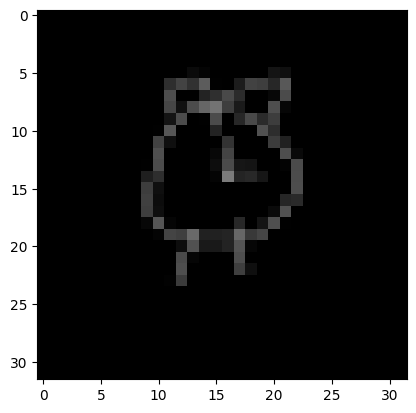

In [476]:

import matplotlib.pyplot as plt

# Step 1: Read the image file
img_file = 'C:\\Users\\AadiJ\\Downloads\\IMG_1442.jpeg'  # Replace 'your_image.jpg' with the path to your image file

img = cv2.imread(img_file)
img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
#img = cv2.bitwise_not(img)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert the image to single channel if necessary
#if len(img.shape) == 3:    
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

print(img.shape)

# Step 2: Reverse the preprocessing steps
# Remove extra dimensions
#img = np.squeeze(img)
img_array = np.array(img)
#plt.imshow(img_array.squeeze())
#img_array = np.reshape(img_array, (784)) 
print(img_array.shape)

# Resize the image to its original size
#img1 = cv2.resize(img_array, (32, 32))#, interpolation=cv2.INTER_AREA)
#img1 = cv2.bitwise_not(img1)
# Step 3: Convert the image to a NumPy array
#img_array = np.array(img)
#print(img_array)
print(img_array.shape)
plt.imshow(img_array.squeeze())
img_array = np.expand_dims(img_array, axis=0)
#img_array = np.array(preprocess_input(img_array))
#img_array= np.expand_dims(img_array, axis=3)
#img_array = np.repeat(img_array, 3, axis=3)
img_array1 = preprocess_input(img_array)
#img_array1[0]

In [477]:
new_8_model = tf.keras.models.load_model('models\mobilenet_doodle_recognition_8_cat_apr4_32x32_XL.h5')
pred = new_8_model.predict(img_array1)
print (pred)
print(categories[np.argmax(pred)])

new_8_model = tf.keras.models.load_model('models\mobilenet_doodle_recognition_8_cat_apr4_32x32_large.h5')
pred = new_8_model.predict(img_array1)
print (pred)
print(categories[np.argmax(pred)])

new_8_model_med = tf.keras.models.load_model('models\mobilenet_doodle_recognition_8_cat_apr4_32x32_med.h5')
pred = new_8_model_med.predict(img_array1)
print (pred)
print(categories[np.argmax(pred)])

new_8_model_small = tf.keras.models.load_model('models\mobilenet_doodle_recognition_8_cat_apr4_32x32_small.h5')
pred = new_8_model_small.predict(img_array1)
print (pred)
print(categories[np.argmax(pred)])



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step
[[0.08108829 0.04152515 0.03643334 0.02263318 0.19998693 0.01038269
  0.6045723  0.00337806]]
bridge


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
[[2.5643341e-02 3.2255563e-04 7.7962241e-04 2.1195734e-02 3.8756993e-01
  5.8475262e-03 5.5839533e-01 2.4599893e-04]]
bridge


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
[[9.8404139e-03 5.6315406e-04 9.4547140e-06 1.1285210e-02 2.9470908e-02
  5.4790120e-04 9.4825310e-01 2.9868454e-05]]
bridge


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
[[0.4420932  0.00239798 0.01029405 0.02470589 0.26593143 0.09121618
  0.1543373  0.00902397]]
alarm-clock


In [539]:
img_array[0][0:32][0:32][0:32][5:20][0].transpose()

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  4,  0,
         0,  0,  0,  0, 20, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  4,  0,
         0,  0,  0,  0, 20, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  4,  0,
         0,  0,  0,  0, 20, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],
      dtype=uint8)

(32, 32)
(1, 32, 32, 3)


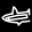

In [372]:

from PIL import Image as im 
img_array = data2[100]
img_array = np.reshape(img_array, (28, 28))
#img_array = np.resize(img_array, (32,32))
img_array = cv2.resize(img_array, (32, 32), interpolation=cv2.INTER_AREA)
print(img_array.shape)
image = im.fromarray(img_array)
# Resize the image to its original size
#img1 = cv2.resize(img_array, (32, 32))#, interpolation=cv2.INTER_AREA)
#img1 = cv2.bitwise_not(img1)
# Step 3: Convert the image to a NumPy array
#img_array = np.array(img)
#print(img_array)
#plt.imshow(img_array.squeeze())
img_array = np.expand_dims(img_array, axis=0)
img_array = np.array(preprocess_input(img_array))
img_array= np.expand_dims(img_array, axis=3)
img_array = np.repeat(img_array, 3, axis=3)
img_array1 = preprocess_input(img_array)
print(img_array1.shape)
image

In [375]:
new_8_model = tf.keras.models.load_model('models\mobilenet_doodle_recognition_8_cat_apr4_32x32_large.h5')
pred = new_8_model.predict(img_array1)
print (pred)
categories[np.argmax(pred)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
[[0.02172538 0.00836168 0.00467332 0.09935816 0.7526157  0.01170942
  0.09673721 0.00481904]]


'beach'

In [217]:
categories

['alarm-clock',
 'airplane',
 'apple',
 'banana',
 'beach',
 'bicycle',
 'bridge',
 'EiffelTower']

In [408]:

from PIL import Image as im 

array = data2[100000]
print(array.shape) 
  
# Reshape the array into a  
# familiar resoluition 
array = np.reshape(array, (28, 28)) 

# show the shape of the array 
print(array.shape) 

# creating image object of 
# above array 
data = im.fromarray(array) 
  
#data.convert("L")
data.save("images/apple5.png")
data

  

(784,)
(28, 28)


In [ ]:
img = im.open("images/airplane2.jpg")
size = (28, 28)
img = img.thumbnail(size)
img_array = np.array(img)

img_array.shape


In [ ]:
pred = new_8_model.predict(test_img_array)
pred


In [ ]:
categories[np.argmax(pred)]